Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('drive')

Mounted at drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab/melanoma/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab/melanoma/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
# delete files created due to augmentator 
import shutil
sub_dirs = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
for index, class_name in enumerate(sub_dirs):
  sub_dir_path = os.path.join(str(data_dir_train), class_name)
  augmentor_dir = os.path.join(str(sub_dir_path), 'output')
  ## all the additional files are created in the output subsirectory
  for files in os.listdir(augmentor_dir):
    path = os.path.join(augmentor_dir, files)
    try:
        shutil.rmtree(path)
    except OSError:
        os.remove(path)
  

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  label_mode='int',
  color_mode='rgb',
  shuffle=True,
  seed=123,
  image_size=(img_height, img_height),
  validation_split=0.15,
  subset='training',
  interpolation='bilinear',
  batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1904 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  label_mode='int',
  color_mode='rgb',
  shuffle=True,
  seed=123,
  image_size=(img_height, img_height),
  validation_split=0.15,
  subset='validation',
  interpolation='bilinear',
  batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 335 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

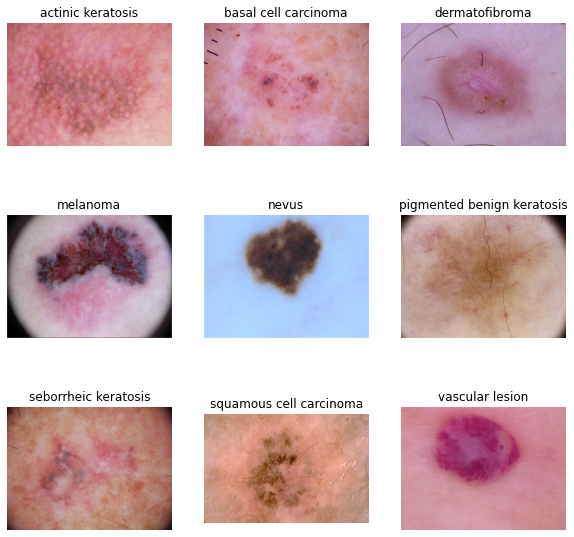

In [11]:
import matplotlib.pyplot as plt
import random

## we will display data in a 3x3 grid

## since the class names are also the sub-directory name
## we shall enumerate over the class names

plt.figure(figsize=(10,10))
for index, class_name in enumerate(class_names):
  sub_dir_path = os.path.join(str(data_dir_test), class_name)
  ## pick up a random file from the directory path
  img_file_name = random.choice(os.listdir(sub_dir_path))
  img_file_path = os.path.join(str(sub_dir_path), img_file_name)
  img = PIL.Image.open(img_file_path)
  plt.subplot(3, 3, index+1)
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off")
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
# ### Your code goes here
# ## Ref: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
# ## Ref: https://www.tensorflow.org/tutorials/images/classification
# normalization_layer = layers.Rescaling(1./255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))


In [14]:
## Ref: https://www.tensorflow.org/guide/keras/sequential_model#when_to_use_a_sequential_model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
60/60 [==============================] - 338s 784ms/step - loss: 1.9615 - accuracy: 0.2616 - val_loss: 1.7620 - val_accuracy: 0.3761
Epoch 2/20
60/60 [==============================] - 1s 24ms/step - loss: 1.5652 - accuracy: 0.4370 - val_loss: 1.4484 - val_accuracy: 0.5104
Epoch 3/20
60/60 [==============================] - 1s 23ms/step - loss: 1.3372 - accuracy: 0.5194 - val_loss: 1.4442 - val_accuracy: 0.5104
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 1.2210 - accuracy: 0.5709 - val_loss: 1.3905 - val_accuracy: 0.5134
Epoch 5/20
60/60 [==============================] - 1s 23ms/step - loss: 1.1243 - accuracy: 0.5951 - val_loss: 1.3962 - val_accuracy: 0.5373
Epoch 6/20
60/60 [==============================] - 1s 23ms/step - loss: 0.9956 - accuracy: 0.6639 - val_loss: 1.3491 - val_accuracy: 0.5701
Epoch 7/20
60/60 [==============================] - 1s 23ms/step - loss: 0.9247 - accuracy: 0.6707 - val_loss: 1.4041 - val_accuracy: 0.5463
Epoch 8/20

### Visualizing training results

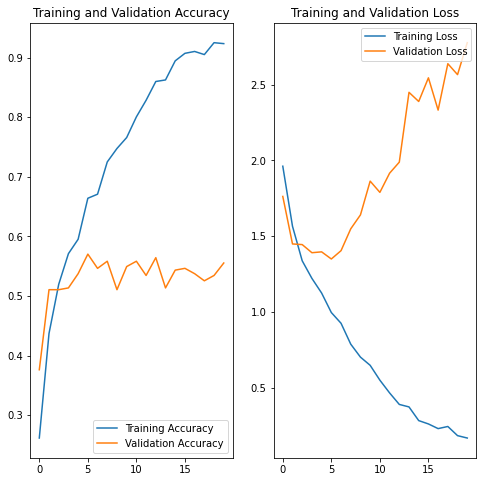

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

***Findings***

Based on the graph above it emergerges that the model is severely overfitting as there is significant gap between training and validation accuracy. Further, the validation loss also appears to increase exponentially.

Overfitting can be reduced by increasing the training base and training the model in highly varied data within the same dataset.

Undertakin morphologial transformations on the images is likely to generate additional samples for the given data and be able to tide over overfitting.

Therefore, we will go with the augmentation strategy.

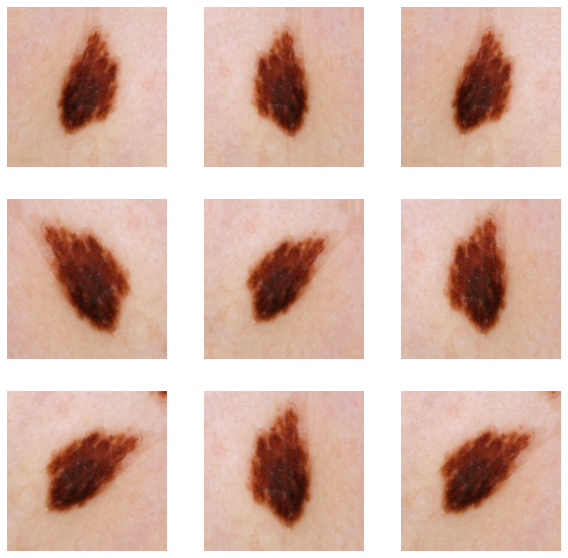

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

## Ref: https://www.tensorflow.org/tutorials/images/data_augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
60/60 [==============================] - 3s 30ms/step - loss: 2.2022 - accuracy: 0.1717 - val_loss: 2.0289 - val_accuracy: 0.2358
Epoch 2/20
60/60 [==============================] - 2s 26ms/step - loss: 1.9583 - accuracy: 0.2721 - val_loss: 1.8135 - val_accuracy: 0.3642
Epoch 3/20
60/60 [==============================] - 2s 26ms/step - loss: 1.6757 - accuracy: 0.3866 - val_loss: 1.5751 - val_accuracy: 0.4866
Epoch 4/20
60/60 [==============================] - 2s 26ms/step - loss: 1.5557 - accuracy: 0.4391 - val_loss: 1.5100 - val_accuracy: 0.4776
Epoch 5/20
60/60 [==============================] - 2s 26ms/step - loss: 1.5918 - accuracy: 0.4412 - val_loss: 1.5511 - val_accuracy: 0.4925
Epoch 6/20
60/60 [==============================] - 2s 26ms/step - loss: 1.4580 - accuracy: 0.4790 - val_loss: 1.6050 - val_accuracy: 0.4627
Epoch 7/20
60/60 [==============================] - 2s 26ms/step - loss: 1.3470 - accuracy: 0.5215 - val_loss: 1.5487 - val_accuracy: 0.5134
Epoch 8/20
60

### Visualizing the results

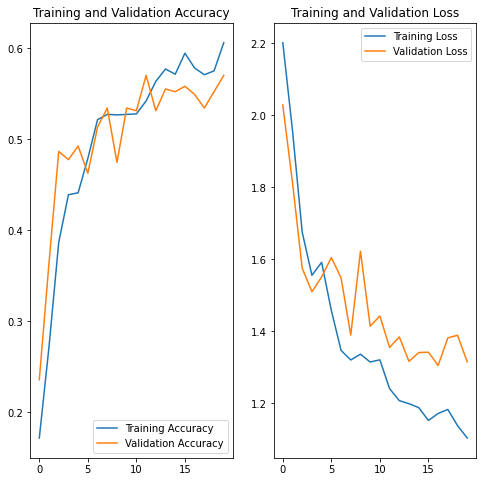

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
total_img_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# get count of images in individual directories
# variable class_names already has the list of all classes(sub directories)
for index, class_name in enumerate(class_names):
  sub_dir_path = os.path.join(str(data_dir_train), class_name)
  ## get number of image files in each class sub-directory
  class_img_count_train = len(list(data_dir_train.glob(class_name+'/*.jpg')))
  percent_count = round(100*class_img_count_train/total_img_count_train,2)
  print("Class {} : {}({})".format(class_name,class_img_count_train,percent_count))

Class actinic keratosis : 114(5.09)
Class basal cell carcinoma : 376(16.79)
Class dermatofibroma : 95(4.24)
Class melanoma : 438(19.56)
Class nevus : 357(15.94)
Class pigmented benign keratosis : 462(20.63)
Class seborrheic keratosis : 77(3.44)
Class squamous cell carcinoma : 181(8.08)
Class vascular lesion : 139(6.21)


#### ***Findings***

#### - Class seborrheic keratosis has the lowest number of samples amounting to 3.44% of total test data.
#### - Pigmented benign keratosis dominates the class distribution at 20.63% of total sample share.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
data_dir_train

PosixPath('/content/drive/MyDrive/Colab/melanoma/Train')

In [28]:
path_to_training_dataset=str(data_dir_train)+"/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE92D4A7210>: 100%|██████████| 500/500 [00:18<00:00, 27.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE92D469110>: 100%|██████████| 500/500 [00:18<00:00, 27.18 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9BFB20F50>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FE92D4EE8D0>: 100%|██████████| 500/500 [01:39<00:00,  5.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FE92C21D410>: 100%|██████████| 500/500 [01:19<00:00,  6.32 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9BFC29FD0>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE92D4A3C90>: 100%|██████████| 500/500 [00:44<00:00, 11.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE92DB79A90>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE92DBB6250>: 100%|██████████| 500/500 [00:17<00:00, 27.82 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list
path_list_new=path_list
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2['Label'].value_counts()

nevus                         500
dermatofibroma                500
basal cell carcinoma          500
seborrheic keratosis          500
pigmented benign keratosis    500
squamous cell carcinoma       500
melanoma                      500
vascular lesion               500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [32]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [34]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 43s 241ms/step - loss: 1.8040 - accuracy: 0.3049 - val_loss: 1.5352 - val_accuracy: 0.4284
Epoch 2/20
169/169 [==============================] - 31s 179ms/step - loss: 1.4982 - accuracy: 0.4271 - val_loss: 1.4021 - val_accuracy: 0.4937
Epoch 3/20
169/169 [==============================] - 34s 197ms/step - loss: 1.4146 - accuracy: 0.4607 - val_loss: 1.4052 - val_accuracy: 0.4915
Epoch 4/20
169/169 [==============================] - 31s 179ms/step - loss: 1.3307 - accuracy: 0.4824 - val_loss: 1.3078 - val_accuracy: 0.5204
Epoch 5/20
169/169 [==============================] - 31s 177ms/step - loss: 1.2617 - accuracy: 0.5245 - val_loss: 1.2704 - val_accuracy: 0.5033
Epoch 6/20
169/169 [==============================] - 31s 175ms/step - loss: 1.2029 - accuracy: 0.5388 - val_loss: 1.2853 - val_accuracy: 0.5115
Epoch 7/20
169/169 [==============================] - 33s 187ms/step - loss: 1.1986 - accuracy: 0.5445 - val_loss: 1.1356 - val_ac

#### **Todo:**  Visualize the model results

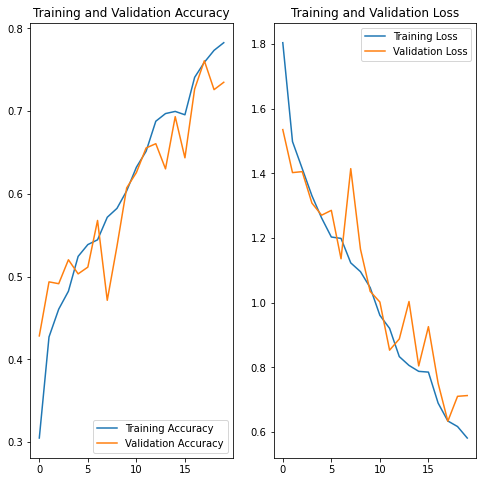

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?




***Results Analysis***

1.   The diffirence between training and validation results is less, indicating that the model is neither under/over fitting
2.   Adding more layers will increase model accuracy.
3.   Hyperparameter tuning will also increase model accuracy.
4.   Normalisation and use of Augmentator has also boosted model accuracy.
5.   Class rebalance has helped the model to be more robust and accurate


